## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

## Loading the Dataset

In [2]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels) = mnist.load_data()

In [3]:
train = mnist_train_images.reshape(60000,784)
test = mnist_test_images.reshape(10000,784)

In [4]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

In [5]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

## Data Visualization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


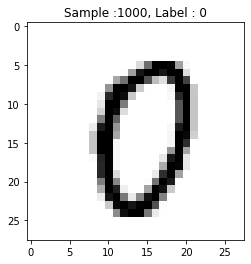

In [6]:
def display(n):
    print(train_labels[n])
    label = train_labels[n].argmax(axis=0)
    img = train[n].reshape([28,28])
    plt.title('Sample :%d, Label : %d' %(n,label))
    plt.imshow(img,cmap=plt.get_cmap('gray_r'))
    plt.show()
display(1000)

## Model Selection 

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Model Training 

In [9]:
model.compile(loss='categorical_crossentropy' , optimizer= RMSprop(), metrics=['accuracy'])

In [10]:
history = model.fit(train,train_labels,batch_size=100,epochs=10,verbose=2, validation_data=(test,test_labels))

Epoch 1/10
600/600 - 12s - loss: 0.2354 - accuracy: 0.9289 - val_loss: 0.0998 - val_accuracy: 0.9685
Epoch 2/10
600/600 - 10s - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.0840 - val_accuracy: 0.9749
Epoch 3/10
600/600 - 11s - loss: 0.0763 - accuracy: 0.9770 - val_loss: 0.0849 - val_accuracy: 0.9785
Epoch 4/10
600/600 - 10s - loss: 0.0634 - accuracy: 0.9820 - val_loss: 0.0706 - val_accuracy: 0.9817
Epoch 5/10
600/600 - 10s - loss: 0.0534 - accuracy: 0.9849 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 6/10
600/600 - 10s - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0727 - val_accuracy: 0.9817
Epoch 7/10
600/600 - 10s - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.0805 - val_accuracy: 0.9822
Epoch 8/10
600/600 - 10s - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.0802 - val_accuracy: 0.9820
Epoch 9/10
600/600 - 10s - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.0843 - val_accuracy: 0.9830
Epoch 10/10
600/600 - 10s - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.0964 - val_accura

## Model Prediction

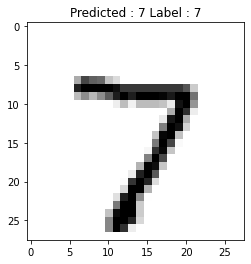

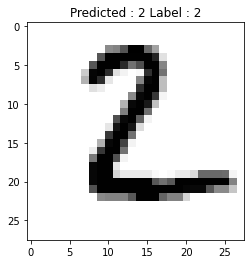

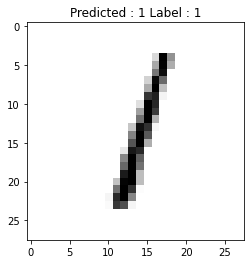

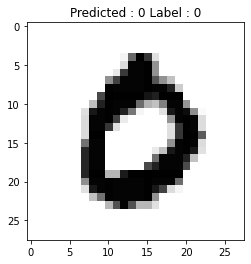

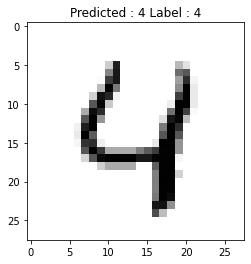

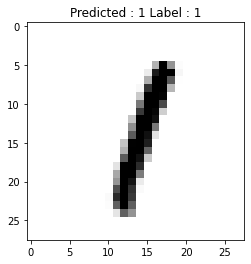

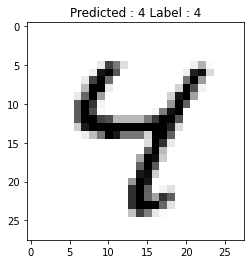

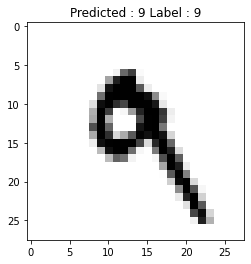

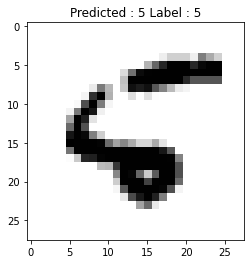

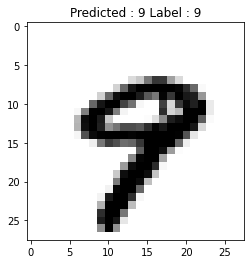

In [11]:
for x in range(10):
    test_img = test[x,:].reshape(1,784)
    predicted = model.predict(test_img).argmax()
    label = test_labels[x].argmax()
    plt.title('Predicted : %d Label : %d' % (predicted, label))
    plt.imshow(test_img.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
    plt.show()

## Showing Wrong Predictions

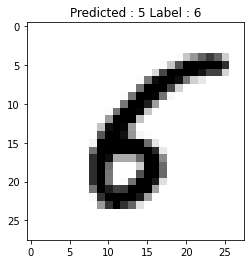

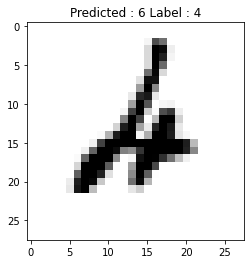

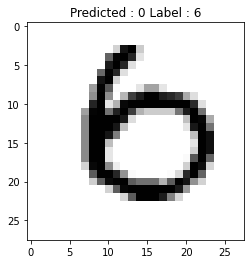

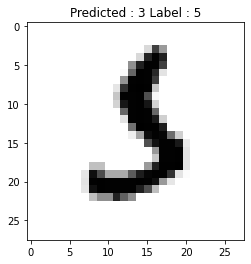

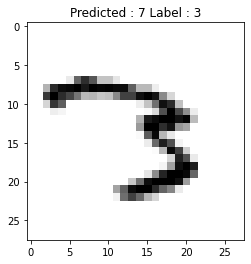

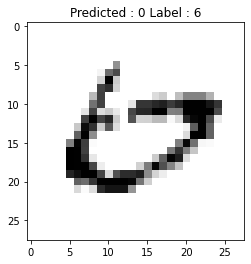

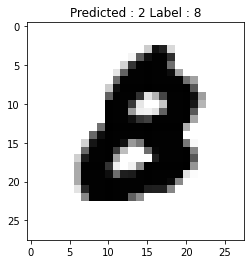

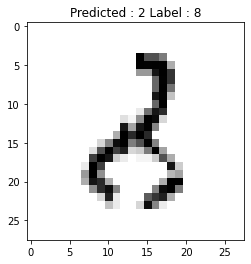

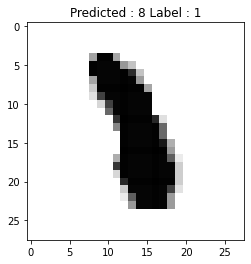

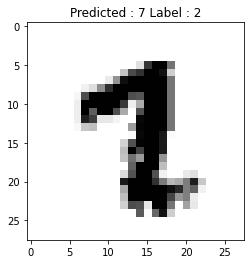

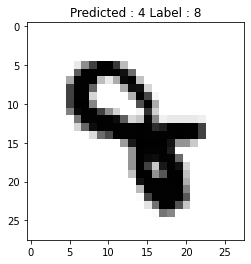

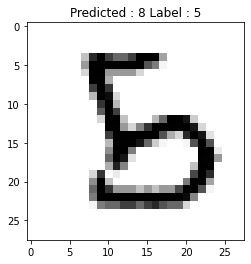

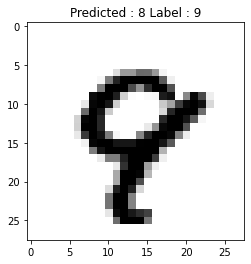

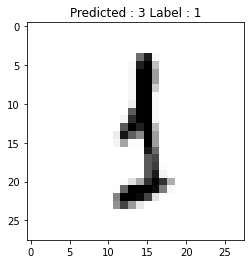

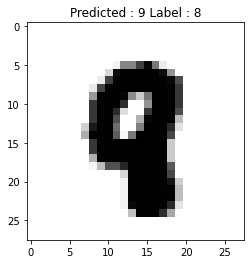

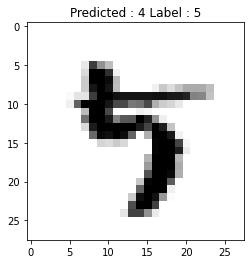

In [12]:
for x in range(1000):
    test_img = test[x,:].reshape(1,784)
    predicted = model.predict(test_img).argmax()
    label = test_labels[x].argmax()
    if (predicted != label):
        plt.title('Predicted : %d Label : %d' % (predicted, label))
        plt.imshow(test_img.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()

## Model Evaluation

In [13]:
score= model.evaluate(test,test_labels,verbose=0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

Test Loss :  0.09638684242963791
Test Accuracy :  0.9825999736785889
